Netflix Content Analysis
A Data Analyst Portfolio Project
This Jupyter Notebook contains the full exploratory data analysis (EDA) of the Netflix Movies and TV Shows dataset.

1. Setup and Data Loading
First, we'll import the necessary libraries and load our dataset.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots for better aesthetics
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Display the first few rows to understand the data
print(df.head())
print(df.info())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

2. Data Cleaning and Pre-processing
We need to check for and handle missing values to ensure our analysis is accurate.

In [32]:
# Check if the DataFrame 'df' exists before proceeding
if 'df' in locals() or 'df' in globals():
    # Check for missing values in each column
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Handle missing values:
    # For 'director' and 'cast', we can fill missing values with 'Unknown'
    df['director'] = df['director'].fillna('No Data')
    df['cast'] = df['cast'].fillna('No Data')

    # Convert 'date_added' to datetime objects, coercing errors to NaT
    # This handles the malformed date string identified in the traceback.
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

    # For 'country' and now 'date_added' (after coercion), we can drop rows with missing values as they are few
    df.dropna(subset=['country', 'date_added'], inplace=True)

    # Create a new column for the year the content was added
    df['year_added'] = df['date_added'].dt.year

    # Re-check for missing values
    print("\nMissing Values After Cleaning:")
    print(df.isnull().sum())
else:
    print("Skipping this step as the DataFrame 'df' was not loaded in the previous step.")


Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Missing Values After Cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          3
duration        3
listed_in       0
description     0
year_added      0
dtype: int64


3. Exploratory Data Analysis (EDA)
A. Content Type Distribution: Movies vs. TV Shows
Let's see the proportion of movies to TV shows on Netflix.

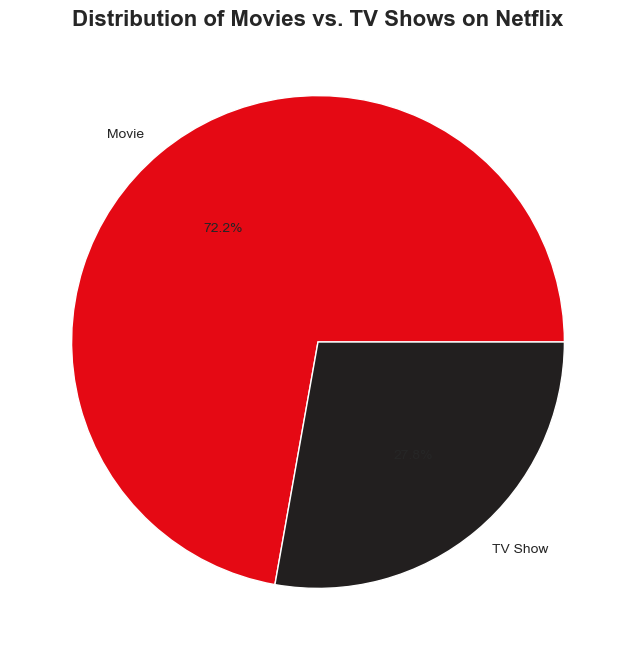

In [7]:
content_counts = df['type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', colors=['#e50914', '#221f1f'])
plt.title('Distribution of Movies vs. TV Shows on Netflix', fontsize=16, fontweight='bold')
plt.show()

B. Content Added Over the Years
How has the amount of content added to Netflix changed over time?

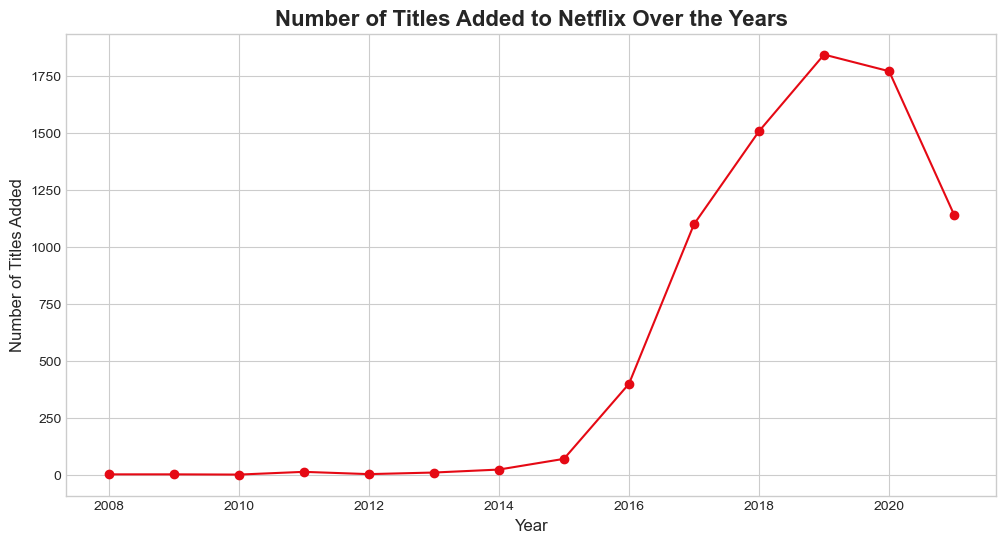

In [9]:
content_added_yearly = df.groupby('year_added')['title'].count()

plt.figure(figsize=(12, 6))
content_added_yearly.plot(kind='line', marker='o', color='#e50914')
plt.title('Number of Titles Added to Netflix Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.show()

C. Top 10 Genres
What are the most popular genres on the platform?

/var/folders/xm/j1kqz3bx51dddwv4h904pj800000gp/T/ipykernel_6137/3715717692.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


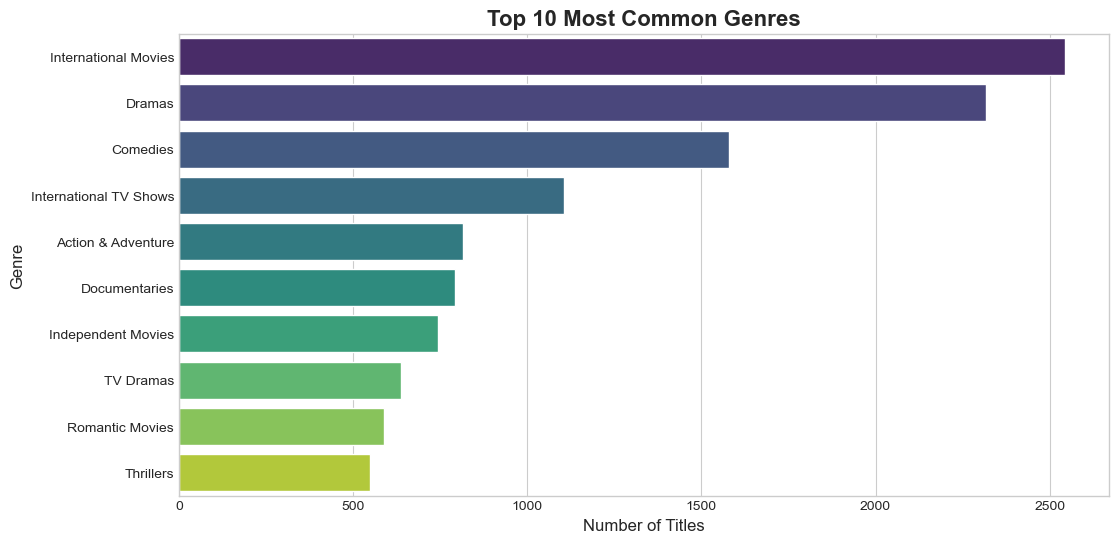

In [11]:
# Split genres and count them
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Most Common Genres', fontsize=16, fontweight='bold')
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

D. Top 10 Directors
Who are the most frequent directors on Netflix?

/var/folders/xm/j1kqz3bx51dddwv4h904pj800000gp/T/ipykernel_6137/2855295858.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


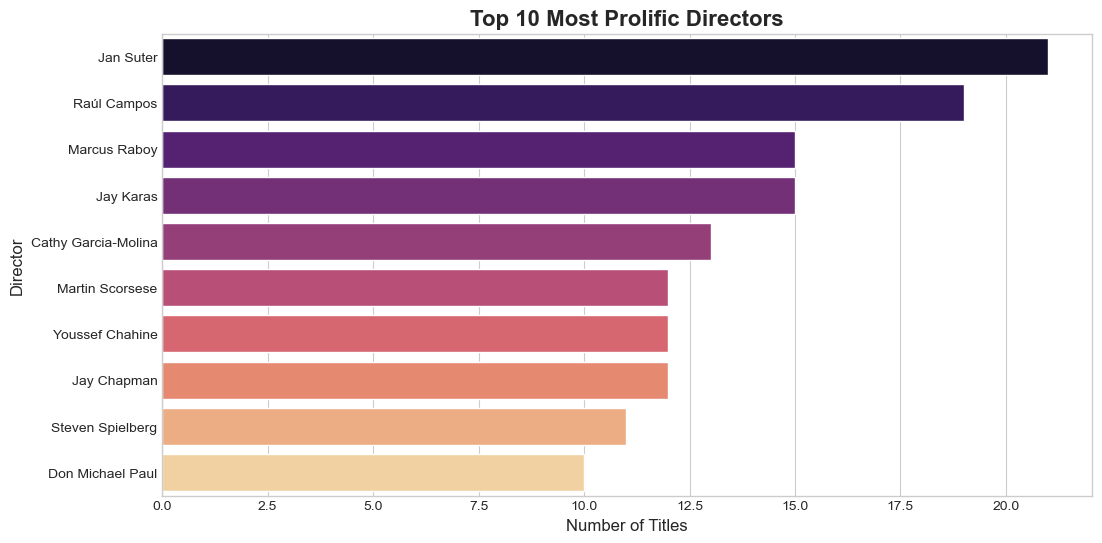

In [16]:
# Split directors and count them, excluding 'Unknown'
directors = df['director'].str.split(', ').explode()
top_directors = directors[directors != 'Unknown'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Most Prolific Directors', fontsize=16, fontweight='bold')
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.show()

E. Distribution of Ratings
What are the most common content ratings?

/var/folders/xm/j1kqz3bx51dddwv4h904pj800000gp/T/ipykernel_6137/4267782958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='rocket')


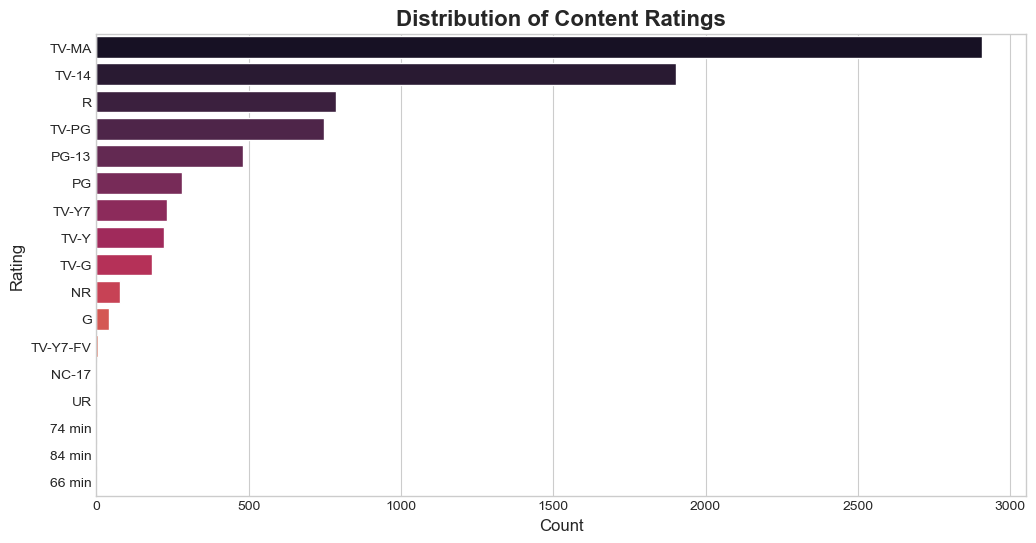

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='rocket')
plt.title('Distribution of Content Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()


4. Conclusion and Next Steps

This analysis provides a strong foundation for understanding Netflix's content strategy. We've seen that:

-- Movies significantly outnumber TV shows.

-- The number of new titles added to Netflix has increased dramatically over the years.

-- Dramas and Comedies are the most prevalent genres.

-- Many directors have contributed multiple titles to the platform.

Further Analysis:

-- Compare the trends of movies vs. TV shows more deeply.

-- Analyze content trends by country of origin.

-- Explore correlations between ratings, release year, and content type.

-- Create a simple recommendation system based on genres or directors.